In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
import pandas as pd
df_train = pd.read_csv("/content/gdrive/MyDrive/NLP projects/NLP sentiment_emotional_clasifier/train_file.csv",header=None)
df_test = pd.read_csv("/content/gdrive/MyDrive/NLP projects/NLP sentiment_emotional_clasifier/test_file.csv",header=None)
df_train.head()

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# Data Exploration & Data Cleaning

In [6]:
df_train.columns=['text','sentiment']
df_test.columns=['text','sentiment']
df_train.head()

,text,sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [7]:
df_train.sentiment.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: sentiment, dtype: int64

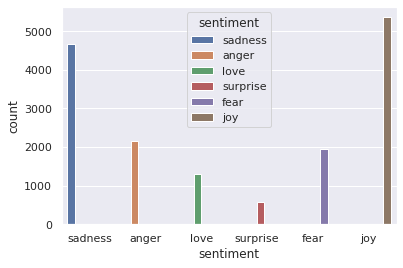

In [8]:
#check the class distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='sentiment', hue="sentiment", data=df_train)
df_train.sentiment.value_counts()

In [9]:
# Remove the not word from the stop words
stoplist = set(stopwords.words("english"))
stoplist.remove('not')

In [10]:
def data_pre_processing(data):
  corpus = []
  for i in range(len(data)):
      review = re.sub('[^a-zA-Z]', ' ', data[i])
      review = review.lower()
      review = review.split()
      #review = [word for word in review if word not in stopwords.words('english')]
      review = [lemmatizer.lemmatize(word) for word in review if not word in stoplist]
      review = ' '.join(review)
      corpus.append(review)
  return corpus
process_data_train=data_pre_processing(df_train['text'].values)
process_data_text=data_pre_processing(df_test['text'].values)
process_data_val=data_pre_processing(df_val['text'].values)

In [11]:
df_train.insert(1, "clean text", pd.DataFrame(process_data_train), True)
df_test.insert(1, "clean text", pd.DataFrame(process_data_text), True)
df_train.head()

,text,clean text,sentiment
0,i didnt feel humiliated,didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...,love
4,i am feeling grouchy,feeling grouchy,anger


In [12]:
df_train.drop(['text'], axis=1,inplace=True)
df_test.drop(['text'], axis=1,inplace=True)
df_test.head()

,clean text,sentiment
0,im feeling rather rotten im not ambitious right,sadness
1,im updating blog feel shitty,sadness
2,never make separate ever want feel like ashamed,sadness
3,left bouquet red yellow tulip arm feeling slig...,joy
4,feeling little vain one,sadness


In [13]:
print(df_train.isnull().any(),df_test.isnull().any())

clean text    False
sentiment     False
dtype: bool clean text    False
sentiment     False
dtype: bool clean text    False
sentiment     False
dtype: bool


In [ ]:
df_train.shape,df_test.shape

In [15]:
#remove duplicate values
df_train.drop_duplicates(keep=False,inplace=True)
df_test.drop_duplicates(keep=False,inplace=True)
df_val.drop_duplicates(keep=False,inplace=True)
df_train.shape,df_test.shape

((15861, 2), (1998, 2), (1998, 2))

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train.sentiment= le.fit_transform(df_train.sentiment.values)
df_test.sentiment= le.fit_transform(df_test.sentiment.values)
df_train.head()
df_train.sentiment.unique()

array([4, 0, 3, 5, 1, 2])

### Length of Tweets

Text(0.5, 1.0, 'Length of Tweets')

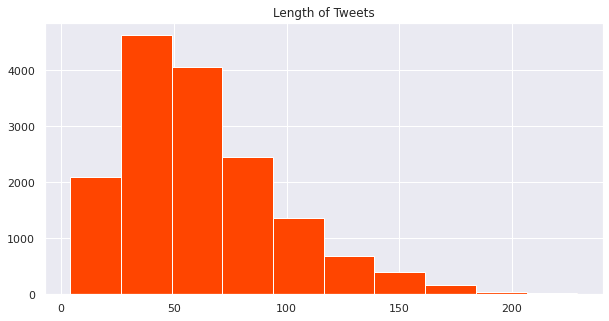

In [17]:
def create_len_df(dataset):
    return dataset.apply(lambda row: pd.Series({
                                               'length_text':len(row['clean text'])}), axis=1)
len_train = create_len_df(df_train)
len_value=len_train.values
import seaborn as sns
sns.set_style('darkgrid')
fig,(ax1)=plt.subplots(1,1,figsize=(10,5))
ax1.hist(len_value,color='orangered')
ax1.set_title('Length of Tweets')

### Number of characters in texts

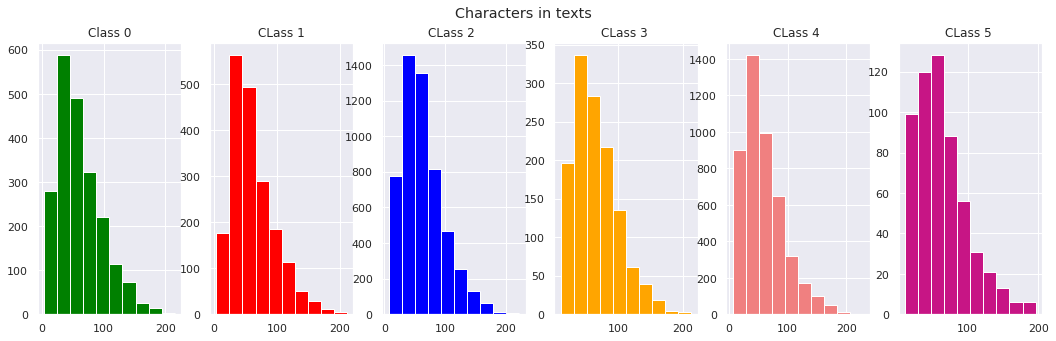

In [18]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(1,6,figsize=(18,5))
text_len=df_train[df_train['sentiment']==0]['clean text'].str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Class 0')

text_len=df_train[df_train['sentiment']==1]['clean text'].str.len()
ax2.hist(text_len,color='red')
ax2.set_title('CLass 1' )

text_len=df_train[df_train['sentiment']==2]['clean text'].str.len()
ax3.hist(text_len,color='blue')
ax3.set_title('CLass 2 ')

text_len=df_train[df_train['sentiment']==3]['clean text'].str.len()
ax4.hist(text_len,color='orange')
ax4.set_title('CLass 3 ')

text_len=df_train[df_train['sentiment']==4]['clean text'].str.len()
ax5.hist(text_len,color='lightcoral')
ax5.set_title('CLass 4 ')
text_len=df_train[df_train['sentiment']==5]['clean text'].str.len()
ax6.hist(text_len,color='mediumvioletred')
ax6.set_title('CLass 5 ')
fig.suptitle('Characters in texts')
plt.show()

#### Average Word Length in a Text

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0.98, 'Average word length in each text')

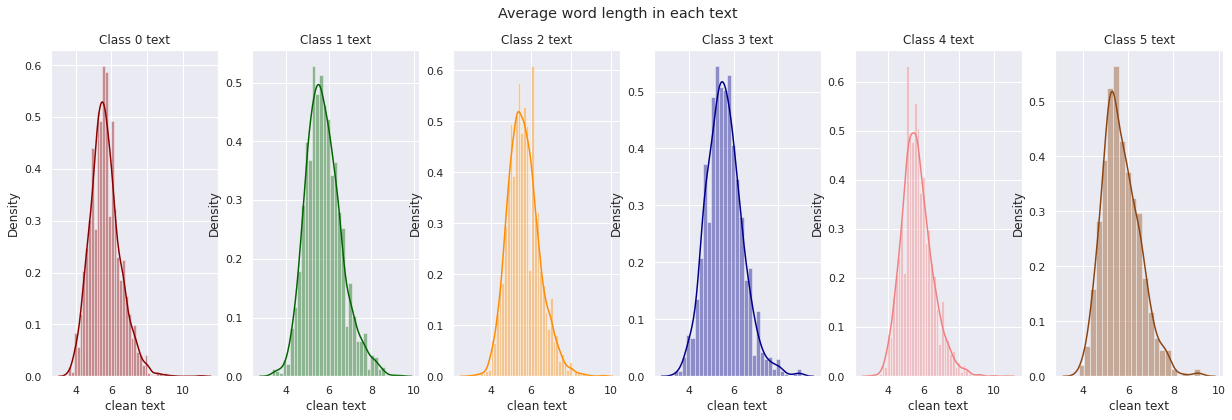

In [19]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(1,6,figsize=(21,6))
word=df_train[df_train['sentiment']==0]['clean text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='darkred')
ax1.set_title('Class 0 text')
word=df_train[df_train['sentiment']==1]['clean text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='darkgreen')
ax2.set_title('Class 1 text')
word=df_train[df_train['sentiment']==2]['clean text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='darkorange')
ax3.set_title('Class 2 text')
word=df_train[df_train['sentiment']==3]['clean text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='darkblue')
ax4.set_title('Class 3 text')
word=df_train[df_train['sentiment']==4]['clean text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='lightcoral')
ax5.set_title('Class 4 text')
word=df_train[df_train['sentiment']==5]['clean text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax6,color='saddlebrown')
ax6.set_title('Class 5 text')
fig.suptitle('Average word length in each text')

In [20]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df_train['clean text'])

from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(15)
most_common = dict(most_common)
most_common

{'day': 673,
 'feel': 11394,
 'feeling': 5428,
 'get': 778,
 'im': 2415,
 'know': 872,
 'like': 2914,
 'little': 731,
 'make': 769,
 'not': 1827,
 'people': 664,
 'really': 942,
 'thing': 672,
 'time': 974,
 'want': 681}

## Model

In [50]:
from keras.layers import Dropout, Dense,Input,Embedding,Flatten, MaxPooling1D, Conv1D
from keras.models import Sequential,Model
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from keras.layers.merge import Concatenate

In [51]:
#convert text to word embedding (Using GloVe):
def loadData_Tokenizer(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open('/content/gdrive/MyDrive/NLP projects/pre-trained-embedding/glov/glove.6B.300d.txt', encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)

In [76]:
def Build_Model_CNN_Text(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=300, dropout=0.5):
    model = Sequential()
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])),
                                 "into shape",str(len(embedding_vector))," Please make sure your"
                                 " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))

    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_cov1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_cov2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='softmax')(l_dense)
    model = Model(sequence_input, preds)

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [77]:
X_train = df_train['clean text']
X_test = df_test['clean text']
y_train = df_train['sentiment']
y_test = df_test['sentiment']

X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(X_train,X_test)

model_CNN = Build_Model_CNN_Text(word_index,embeddings_index, 6)

model_CNN.summary()

history=model_CNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=15,
                              batch_size=32,
                              verbose=2)

Found 14323 unique tokens.
(17859, 500)
Total 400001 word vectors.
Filter   5
Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 500, 300)     4297200     input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_42 (Conv1D)              (None, 499, 128)     76928       embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_43 (Conv1D)              (None, 498, 128)     115328      embedding_6[0][0]                
______________

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


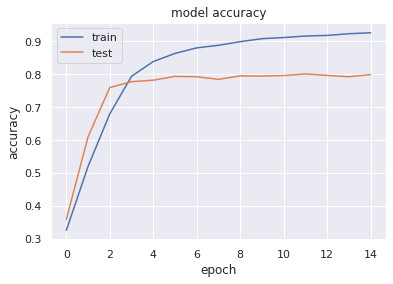

In [78]:
import matplotlib.pyplot as plt
import numpy
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
predicted = model_CNN.predict(X_test_Glove)
predicted = np.argmax(predicted, axis=1)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       275
           1       0.81      0.67      0.73       224
           2       0.86      0.83      0.85       695
           3       0.81      0.67      0.73       159
           4       0.72      0.90      0.80       579
           5       0.61      0.55      0.58        66

    accuracy                           0.80      1998
   macro avg       0.79      0.73      0.75      1998
weighted avg       0.81      0.80      0.80      1998



In [80]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)


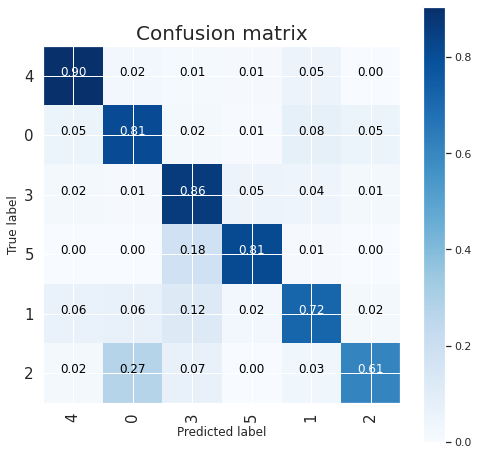

In [81]:
from sklearn.metrics import confusion_matrix
import itertools
#cm = confusion_matrix(y_test, y_pred)
cm =confusion_matrix(predicted, y_test)

cnf_matrix = confusion_matrix(predicted, y_test)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=df_train.sentiment.unique(), title="Confusion matrix")
plt.show()